In [17]:
from astropy.table import Table
import numpy as np
from matplotlib import pyplot as plt
import astropy
%matplotlib inline

In [90]:
cat = Table.read("apogee_bulge.fits.gz", 1)
uniqueFields = np.unique(cat["FIELD"])

# Remove trailing spaces
for i in range(len(cat)):
    cat['FIELD'][i] = cat['FIELD'][i].strip()

#postive longitude is left side of buldge

#use help(INSERT COMMAND HERE) to get help on things

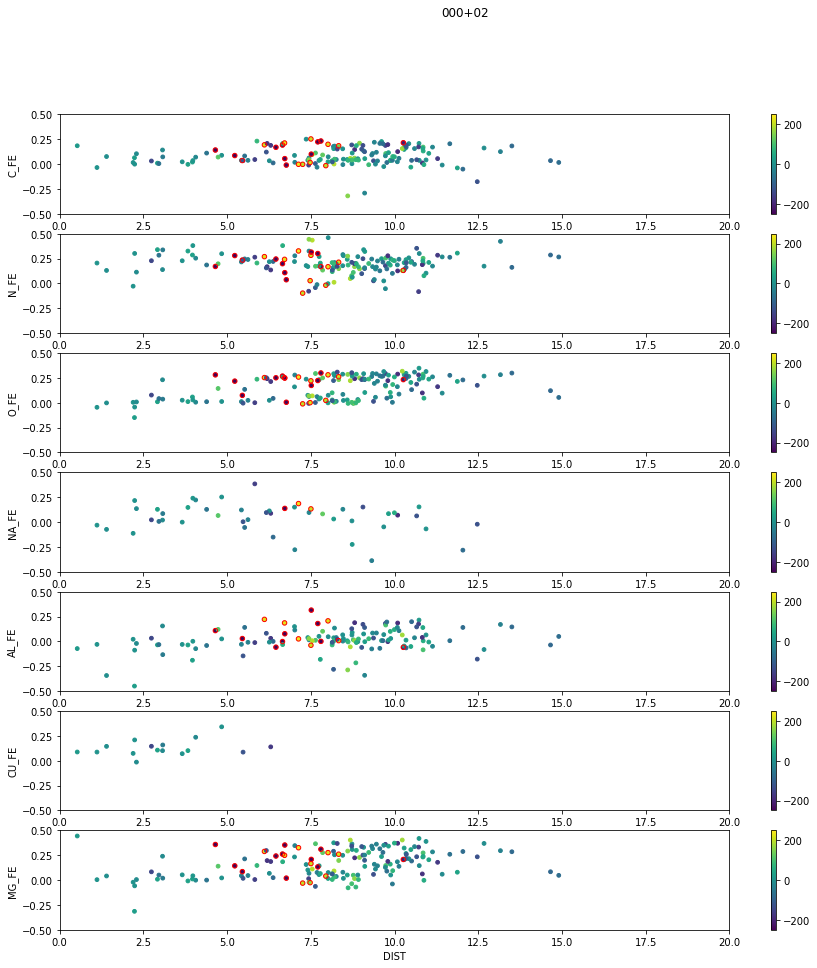

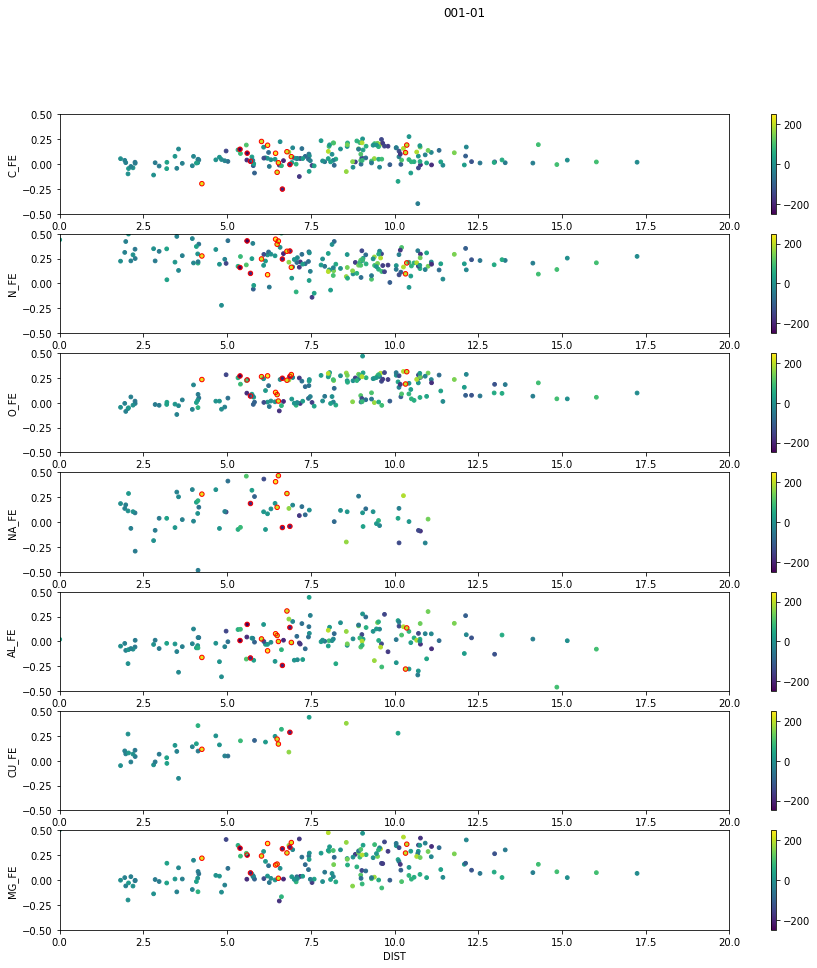

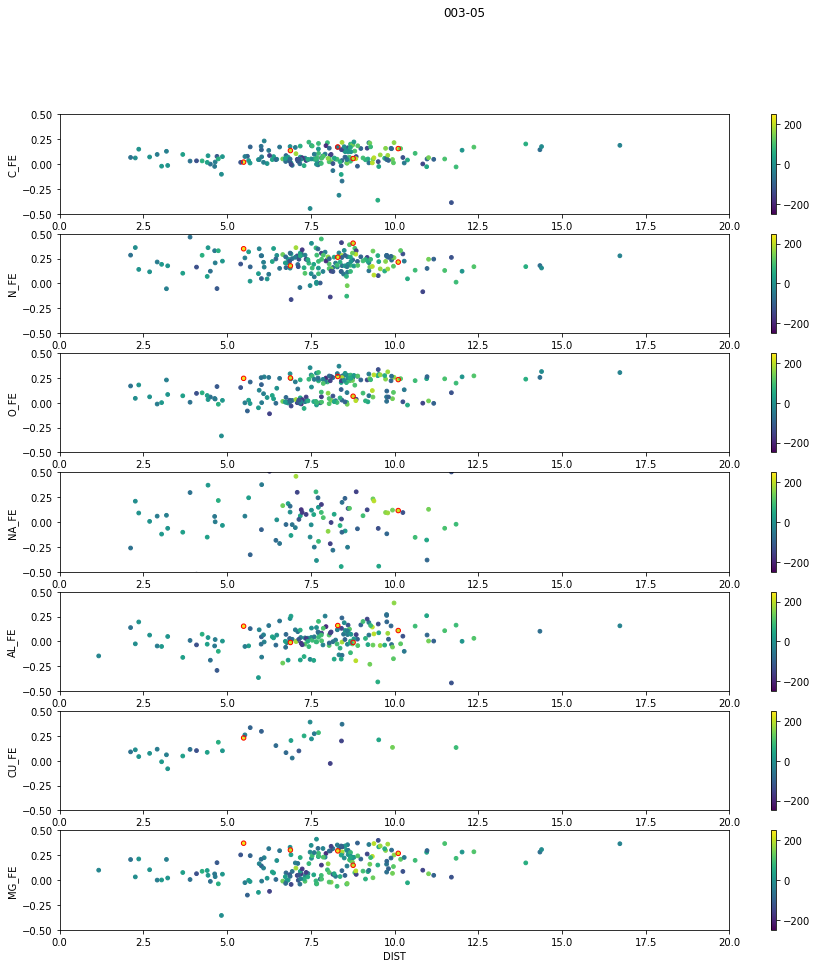

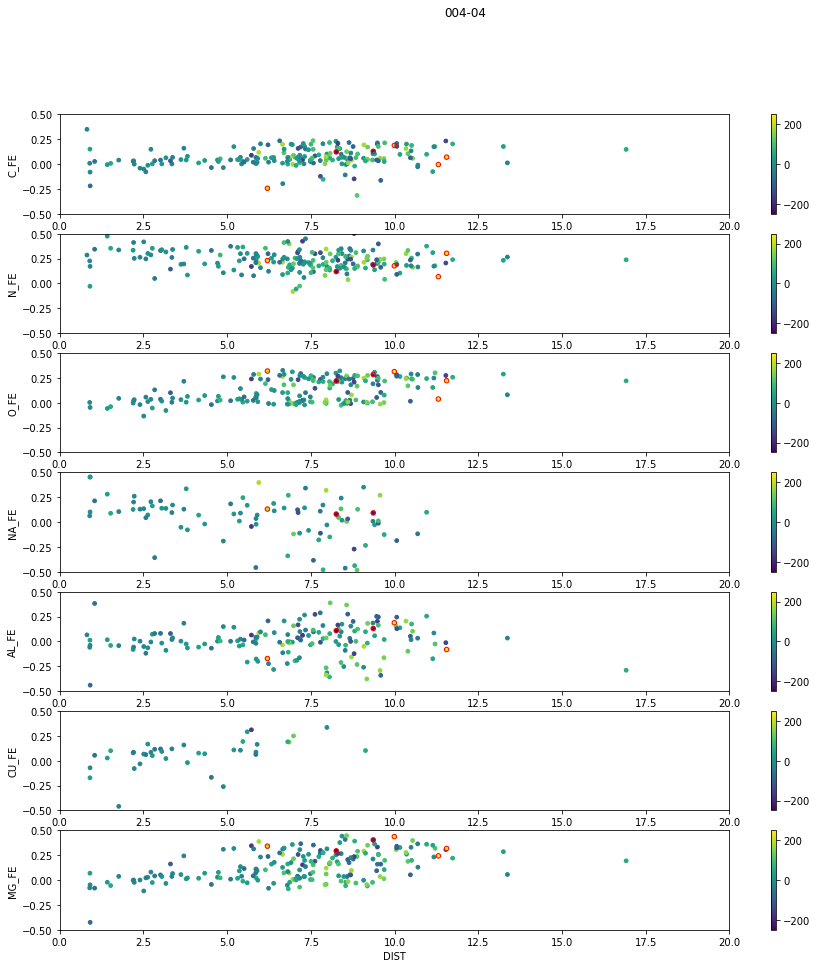

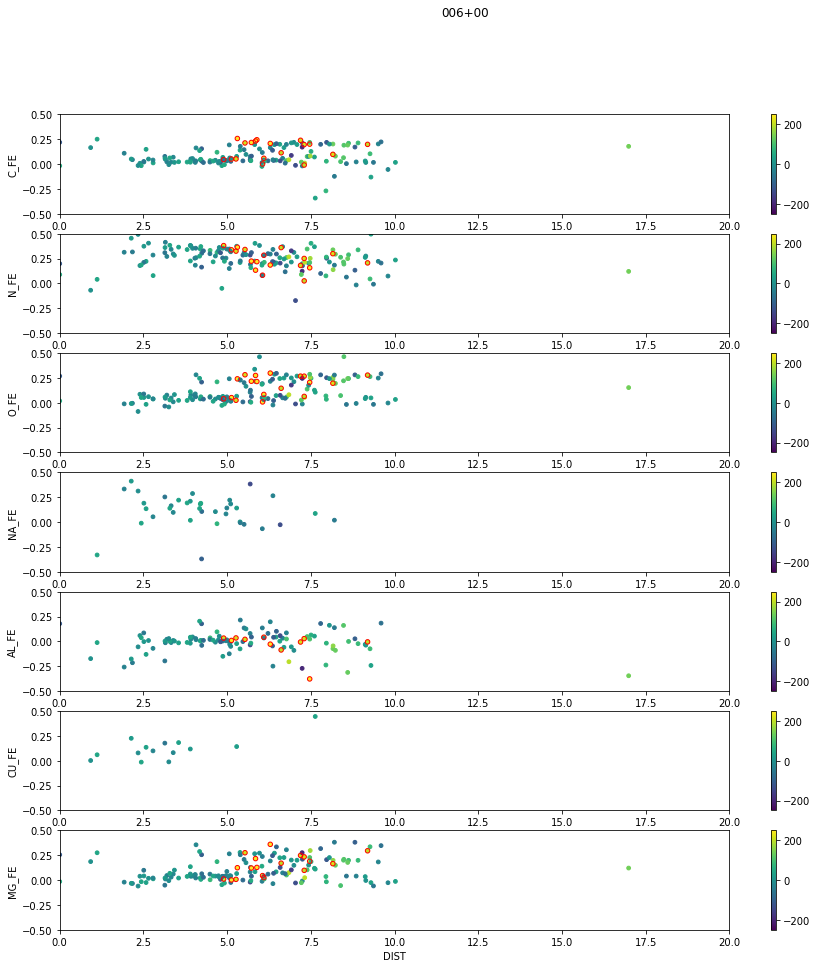

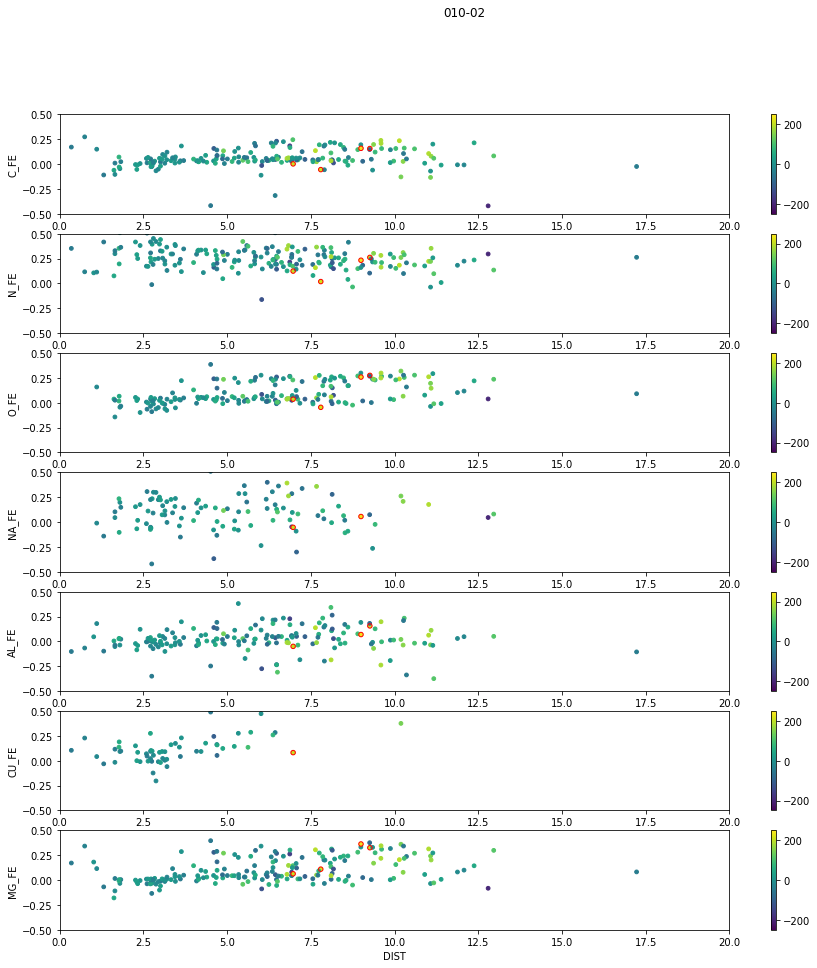

In [91]:
#looks at chemistry graphs
chemFields = ["000+02", "001-01", "003-05", "004-04", "006+00", "010-02"]
chemistry = ["C_FE", "N_FE", "O_FE", "NA_FE", "AL_FE", "CU_FE", "MG_FE"]

#overplot individual stars by grabbing them from the fields/ use np.where to find high velocity stars and plot
#use a second scatter graph to plot only the high velocity stars / use red open circles

for i in chemFields:
    plt.figure(i, figsize = (15,15))
    for k,element in enumerate(chemistry, start=1):
        ind, = np.where((cat["FIELD"] == i) & (cat["SNR"]>20) & (cat["LOGG"]<3.8) & (abs(cat[element]<10)))
        field = cat[ind]
        dist = field["DIST"]
        nElement = field[element]
        

        
        indFast, = np.where((cat["FIELD"] == i) & (cat["SNR"]>20) & (cat["LOGG"]<3.8) & (abs(cat[element]<10)) & (200<abs(cat["VHELIO_AVG"])))
        fieldFast = cat[indFast]
        distFast = fieldFast["DIST"]
        nElementFast = fieldFast[element]
        
        
        
        plt.subplot(7, 1, k)
        plt.xlim(0,20)
        plt.ylim(-.5,.5)
        plt.xlabel("DIST")
        plt.ylabel(element)
        plt.suptitle(i)
        plt.scatter(dist, nElement, c = field["VHELIO_AVG"], vmin = -250, vmax = 250, s=14, marker = "o")
        plt.colorbar()
        plt.scatter(distFast, nElementFast, s = 20, edgecolors = "r", facecolors = "none", marker = "o")
        plt.show

array([20126, 20234, 20601, 20670, 20707, 20826, 20854, 20917, 20933,
       21028, 21072, 21104, 21153, 21228, 21297, 21349, 21403, 21432,
       21654, 21655, 21693, 21750, 21781, 21809, 21836, 21854, 21858,
       21878, 21921, 21939, 21998, 22029, 22087, 22173, 22174, 22265,
       22285, 22521, 22530, 22535, 22541, 22583, 22603, 22614, 22659,
       22666, 22670, 22673, 22679, 22690, 22721, 22743, 22796, 22853,
       22888, 22896, 22915, 23011, 23099, 23101, 23200, 23203, 23216,
       23222, 23231, 23240, 23253, 23297, 23302, 23318, 23354, 23423,
       23434, 23465, 23480, 23498, 23543, 23557, 23569, 23616, 23642,
       23673, 23728, 23805, 23829, 23882, 23924, 23929, 23930, 24107,
       24116, 24126, 24129, 24149, 24158, 24181, 24318, 24334, 24390,
       24424, 24459, 24529, 24535, 24546, 24597, 24616, 24664, 24697,
       24703, 24706, 24778, 24812, 24816, 24852, 24857, 24881, 24914,
       24968, 24997, 25015, 25018, 25034, 25063, 25065, 25092, 25128,
       25173, 25206,